In [56]:
import sys, os
sys.path.insert(0, '../')
from pathlib import Path
import math
import numpy as np
import matplotlib.pyplot as plt 
from deepssfp import dataloader, view, recon

In [2]:
path = Path('../../data/2017_DeepSSFP/10282017_SSPF Smoothing DL')
path

PosixPath('../../data/2017_DeepSSFP/10282017_SSPF Smoothing DL')

In [3]:
f0 = Path(os.path.join(path, 'meas_MID885_trufi_phi0_FID4833.dat'))
f1 = Path(os.path.join(path, 'meas_MID894_trufi_phi90_FID4842.dat'))
f2 = Path(os.path.join(path, 'meas_MID903_trufi_phi180_FID4851.dat'))
f3 = Path(os.path.join(path, 'meas_MID912_trufi_phi270_FID4860.dat'))
files = [f0,f1,f2,f3]
files

[PosixPath('../../data/2017_DeepSSFP/10282017_SSPF Smoothing DL/meas_MID885_trufi_phi0_FID4833.dat'),
 PosixPath('../../data/2017_DeepSSFP/10282017_SSPF Smoothing DL/meas_MID894_trufi_phi90_FID4842.dat'),
 PosixPath('../../data/2017_DeepSSFP/10282017_SSPF Smoothing DL/meas_MID903_trufi_phi180_FID4851.dat'),
 PosixPath('../../data/2017_DeepSSFP/10282017_SSPF Smoothing DL/meas_MID912_trufi_phi270_FID4860.dat')]

In [4]:
data = dataloader.read_rawdata(files[3], is3D=True, doChaAverage = True, doAveAverage = True);
M0 = data['data']

pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/2.06G [00:00<?, ?B/s]

read data:   0%|          | 0/65535 [00:00<?, ?it/s]

In [5]:
data['dims']

['Par', 'Lin', 'Col']

In [6]:
data['shape']

(256, 256, 256)

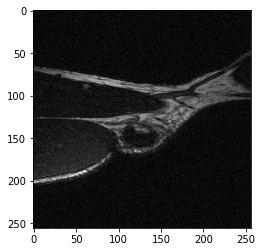

In [7]:
plt.imshow(abs(M0[128,:,:]), cmap='gray')

In [8]:
%%capture
M = []
for file in files:
    data = dataloader.read_rawdata(file, is3D=True, doChaAverage = True, doAveAverage = True);
    M.append(data['data'])

In [9]:
for m in M:
    print(m.shape)

(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)


In [10]:
Mall = np.stack(M)
print(np.max(abs(Mall)), np.min(abs(Mall)), np.mean(abs(Mall)), np.std(abs(Mall)))
vmax = np.mean(abs(Mall) + 2 * np.std(abs(Mall)))

1.7523781596582896e-08 3.850062412773523e-14 6.287560099891625e-10 1.0596494900682277e-09


In [11]:
Mall.shape

(4, 256, 256, 256)

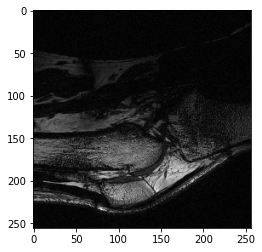

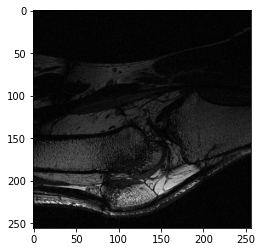

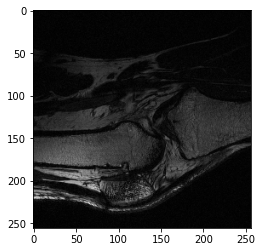

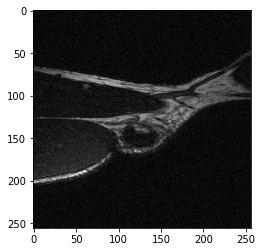

In [12]:
for m in M:
    plt.imshow(abs(m[128,:, :]), cmap='gray')
    plt.show()

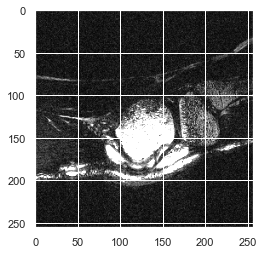

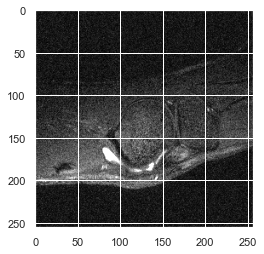

In [60]:
i =180
plt.imshow(abs(M[0][i,:, :]), cmap='gray', vmax=vmax)
plt.show()
plt.imshow(abs(M[3][i+66,:, :]), cmap='gray', vmax=vmax)
plt.show()

In [64]:
s0 = 40; s1 = 180
m = [M[0][s0:s1,:,:], M[1][s0:s1,:,:], M[2][s0:s1,:,:], M[3][s0:s1,:,:]]
m = np.stack(m, axis=-1)
m.shape

(140, 256, 256, 4)

In [80]:
em = recon.gs_recon(m[100,:,:,:], pc_axis=2, second_pass=True)

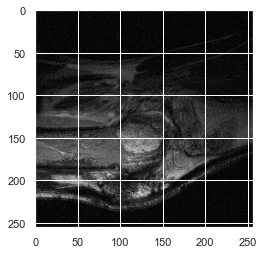

In [81]:
plt.imshow(abs(em), cmap='gray')

In [79]:
EM = []
for index in range(m.shape[0]):
    EM.append(recon.gs_recon(m[index,:,:,:], pc_axis=2, second_pass=True))
EM = np.stack(EM)
EM.shape

(140, 256, 256)

MovieWriter ffmpeg unavailable; using Pillow instead.


./images/em.gif


IndexError: index 140 is out of bounds for axis 0 with size 140

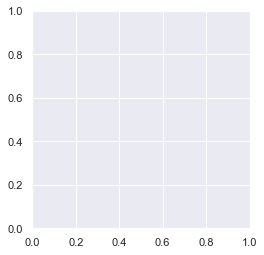

In [82]:
view.view3D(EM, 'em.gif')